# Perbandingan Hasil Antara Decision Tree, KNN, Naive Bayes pada Data Iris

**Nama  : Rizki Ardian Samudra**

**NIM   : 210411100179**

**Kelas : Penambangan Data-C**

Decision Tree pada dasarnya adalah algoritma machine learning yang digunakan untuk melakukan klasifikasi dan regresi dengan membangun model berupa struktur pohon keputusan. Algoritma ini melakukan pembagian data berdasarkan atribut-atribut yang ada pada data, sehingga setiap cabang dari pohon keputusan merepresentasikan satu aturan yang terbentuk dari kombinasi atribut-atribut tersebut.

KNN pada dasarnya adalah algoritma supervised machine learning. Dalam bahasa yang lebih sederhana ialah mencari pola dalam data yang ada untuk membuat prediksi. Prediksi tersebut bisa menjadi memprediksi harga mobil atau mengidentifikasi pelanggan mana yang akan merespons dengan baik pada kampanye pemasaran email baru.

Naive Bayes pada dasarnya adalah sebuah algoritma klasifikasi yang berdasarkan pada teorema Bayes dengan mengasumsikan bahwa setiap fitur (atau atribut) pada data yang diamati adalah independen satu sama lain. Oleh karena itu, algoritma ini dianggap "naif" karena tidak mempertimbangkan interaksi antara fitur.

Mengimport library yang diperlukan

In [102]:
import pandas as pd
import numpy as np

Import data kita

In [103]:
df = pd.read_csv('https://gist.githubusercontent.com/rizkiardian/c27b9d4340fe70046c848bb83d3f6cc5/raw/1aa7222d046761b7b5df703e9f38063ad227aa72/IrisDatasetAsli')

jumlah_baris = df.shape[0]
df.head(jumlah_baris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Mengecek nilai yang hilang/kosong pada data

In [104]:
df_copy = df.copy()
df_copy.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Ganti nilai yang mengandung tanda tanya (?) menjadi nilai kosong

In [105]:
df_copy = df_copy.replace('?',np.nan)

Cek lagi berapa nilai yang kosong pada data

In [106]:
df_copy.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Setelah itu kita lihat type data pada fitur, jika type datanya bukan numerik/float maka perlu diganti type datanya

In [107]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 1. Decision Tree

Import library Decision Tree

In [108]:
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Memisahkan fitur dan label target

In [109]:
df_DecisionTree = df_copy.copy()
X = df_DecisionTree[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df_DecisionTree['species']

Membagi dataset menjadi data training dan data testing (0.8/0.2)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

Membuat model Decision Tree dengan metode impurity criterion Gini

In [111]:
# membuat klasifikasi Decision Tree dengan kedalaman maksimum 3 dan kriteria pemisahan (splitting) Gini impurity.
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)

# memasukkan model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Membuat visualisasi decision tree 

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]')

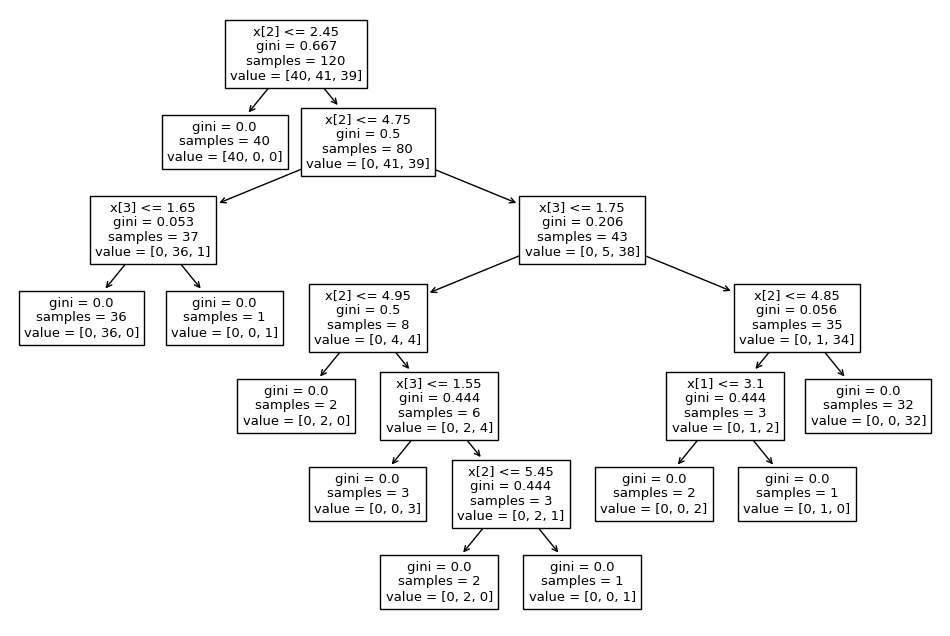

In [112]:
# membuat figure dengan ukuran 12x8 inch (atau sekitar 30x20 cm).
plt.figure(figsize=(12,8))

# membuat visualisasi decision tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

Menampilkan visualisasi decision tree dalam bentuk grafik yang berisi informasi seperti fitur yang digunakan, nilai ambang yang digunakan dalam setiap node, dan label kelas yang dihasilkan oleh model.

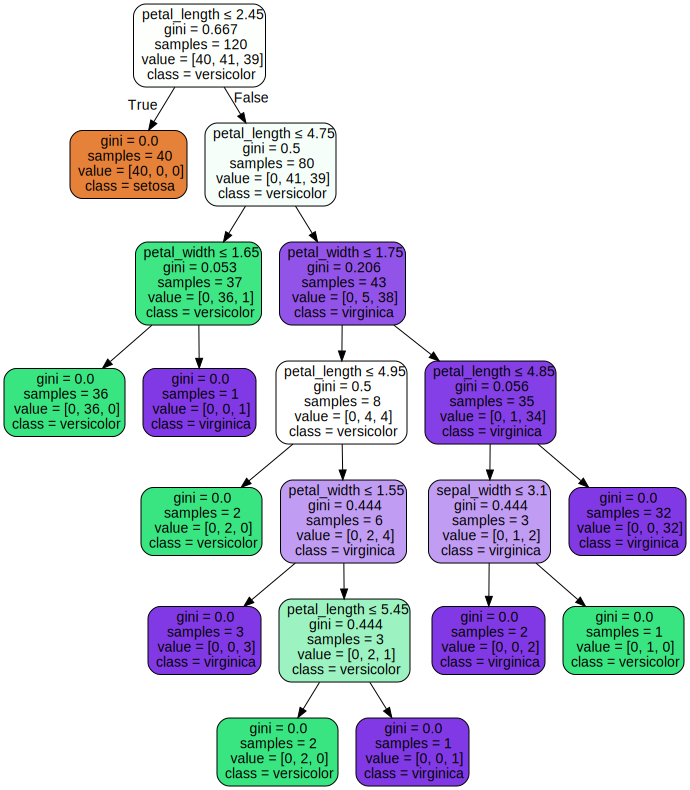

In [113]:
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train.unique(),  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

Menghitung akurasi Decision Tree

In [114]:
# menghitung akurasi pada data training
y_pred_train_gini = clf_gini.predict(X_train)
print("Accuracy on training set (Gini): {:.2f}".format(accuracy_score(y_train, y_pred_train_gini)))

# menghitung akurasi pada data testing
y_pred_gini = clf_gini.predict(X_test)
print("Accuracy on testing set (Gini): {:.2f}".format(accuracy_score(y_test, y_pred_gini)))

Accuracy on training set (Gini): 1.00
Accuracy on testing set (Gini): 1.00


### Kesimpulan

Berdasarkan hasil diatas, Maka dapat dilihat bahwa akurasi pada data training adalah 100% dan akurasi pada data testing adalah 100%. Itu menunjukkan bahwa model Decision Tree yang dibuat dapat memprediksi dengan sempurna data yang diberikan pada saat training dan testing.

## 2. KNN

Import library KNN

In [115]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import LabelEncoder

Mengubah tipe data kategorikal menjadi tipe data numerik

In [116]:
df_Knn = df_copy.copy()
le = LabelEncoder()
df_Knn['species'] = le.fit_transform(df_Knn['species'])

Setelah itu kita lihat type data pada setiap fitur

In [117]:
df_Knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Selanjutnya kita lihat data terbaru

In [118]:
df_Knn.head(jumlah_baris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Melakukan normalisasi data, yaitu mengubah setiap nilai ke dalam rentang antara 0 hingga 1. Kita akan menggunakan metode min-max, yaitu: x - min / max - min. Terdapat juga rumus-rumus lain yang dapat digunakan, misalnya metode simple feature scaling atau metode z-score. Namun perlu diingat bahwa kolom target tidak akan dinormalisasi (kolom species).

Rumus Metode Min-Max:

$$
x_{n e w}=\frac{x_{o l d}-x_{\min }}{x_{\max }-x_{\min }}
$$

In [119]:
species_column = df_Knn['species']
df_Knn = df_Knn[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].copy()
df_Knn = (df_Knn - df_Knn.min())/(df_Knn.max() - df_Knn.min())
df_Knn['species'] = species_column.copy()
df_Knn.head(jumlah_baris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


Sebelum kita membagi dataset, pastikan untuk mengacak datanya secara acak.

Menginisialisasi objek knn dari kelas KNeighborsRegressor yang merupakan algoritma K-Nearest Neighbors untuk melakukan regresi. Kemudian, kita melakukan randomisasi indeks dari dataset menggunakan np.random.permutation() dengan seed 1 untuk memastikan hasil yang konsisten.

In [120]:
knn = KNeighborsRegressor()

np.random.seed(1)
index_shuffled = np.random.permutation(df_Knn.index)
shuffled_car_data = df_Knn.loc[index_shuffled]

Kita akan menggunakan 80% data untuk training dan 20% sisanya untuk testing.

Ukuran dataset yang telah diacak dihitung menggunakan atribut shape, kemudian dikalikan dengan 0.80 untuk mendapatkan indeks data terakhir yang akan digunakan untuk melatih model. Hasilnya kemudian disimpan dalam variabel train_index. Dataset shuffled_car_data kemudian dibagi menjadi dua bagian: training data dan testing data.

In [121]:
train_index = int(shuffled_car_data.shape[0] * 0.80)
training_data = shuffled_car_data.iloc[0:train_index]
testing_data = shuffled_car_data.iloc[train_index:]

Melatih model dengan data training.

In [122]:
knn.fit(training_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], training_data['species'])

KNeighborsRegressor()

Memprediksi label (spesies) pada data uji.

In [123]:
prediction = knn.predict(testing_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

Menghitung akurasi dari model.

Menghitung akurasi model dengan mengukur berapa persen data testing yang berhasil diprediksi dengan (threshold default 0.5.). Threshold dinyatakan sebagai 0.5, yang berarti jika selisih antara prediksi dan nilai aktual dari data pengujian kurang dari atau sama dengan 0,5, maka prediksi dianggap benar.

In [124]:
accuracy = np.mean(np.abs(prediction - testing_data['species']) <= 0.5)

print(f"Akurasi model KNN: {accuracy:.2%}")

Akurasi model KNN: 96.67%


### Kesimpulan

Berdasarkan hasil diatas, bahwa model KNN yang telah dilatih dengan menggunakan data training berhasil memprediksi spesies Data Iris pada data uji dengan akurasi sebesar 96.67%. Hal ini menunjukkan bahwa model tersebut memiliki performa yang baik dalam melakukan prediksi pada data yang belum pernah dilihat sebelumnya.

## 3. Naive Bayes

Import library Naive Bayes

In [125]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

Mengubah tipe data kategorikal menjadi tipe data numerik

In [126]:
df_NaiveBayes = df_copy.copy()
le = LabelEncoder()
df_NaiveBayes['species'] = le.fit_transform(df_NaiveBayes['species'])

Setelah itu kita lihat type data pada setiap fitur

In [127]:
df_NaiveBayes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Selanjutnya kita lihat data terbaru

In [128]:
df_NaiveBayes.head(jumlah_baris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Melakukan normalisasi data, yaitu mengubah setiap nilai ke dalam rentang antara 0 hingga 1. Kita akan menggunakan metode min-max, yaitu: x - min / max - min. Terdapat juga rumus-rumus lain yang dapat digunakan, misalnya metode simple feature scaling atau metode z-score. Namun perlu diingat bahwa kolom target tidak akan dinormalisasi (kolom species).

Rumus Metode Min-Max:

$$
x_{n e w}=\frac{x_{o l d}-x_{\min }}{x_{\max }-x_{\min }}
$$

In [129]:
species_column = df_NaiveBayes['species']
df_NaiveBayes = df_NaiveBayes[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].copy()
df_NaiveBayes = (df_NaiveBayes - df_NaiveBayes.min())/(df_NaiveBayes.max() - df_NaiveBayes.min())
df_NaiveBayes['species'] = species_column.copy()
df_NaiveBayes.head(jumlah_baris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


Pemotongan Data atau Data Slicing.

Pisahkan data menjadi data training dan data test (80/20). Kita dapat dengan mudah melakukan langkah ini menggunakan metode train_test_split() dari sklearn.

In [130]:
features = df_NaiveBayes.values[:,:4]
target = df_NaiveBayes.values[:,4]
features_train, features_test, target_train, target_test = train_test_split(features,target, test_size = 0.2, random_state = 42)

Implementasi Gaussian Naive Bayes.

Setelah selesai preprocessing data. saatnya menerapkan algoritma pembelajaran mesin atau machine learning. Kita akan menggunakan modul GaussianNB sklearn.

In [131]:
clf = GaussianNB()
clf.fit(features_train, target_train)
target_pred = clf.predict(features_test)

Akurasi model Gaussian Naive Bayes

In [132]:
accuracy = accuracy_score(target_test, target_pred, normalize = True)

print(f"Akurasi model Naive Bayes: {accuracy:.2%}")

Akurasi model Naive Bayes: 100.00%


### Kesimpulan

Berdasarkan hasil diatas, bahwa model Naive Bayes yang telah dilatih dengan menggunakan data training berhasil memprediksi spesies Data Iris pada data uji dengan akurasi sebesar 100%. Hal ini menunjukkan bahwa model tersebut memiliki performa yang sangat baik dalam melakukan prediksi pada data yang belum pernah dilihat sebelumnya.